# Etude de clustering

Exercice consistant à utiliser un dataset dans l'objectif de s'exercer à la clusterisation.

Origine du dataset : kaggle.com "cardiovascular-risk-factor-data" : To predict the 10-year risk of future coronary heart disease (CHD) in patients https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data


Variables Description


Demographic:

Sex: male or female ("M" or "F") 

Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

Education: The level of education of the patient (categorical values - 1,2,3,4) 


Behavioral:

is_smoking: whether or not the patient is a current smoker ("YES" or "NO") 

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 



Medical (history):

BP Meds: whether or not the patient was on blood pressure medication (Nominal) 

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) 

Prevalent Hyp: whether or not the patient was hypertensive (Nominal) 

Diabetes: whether or not the patient had diabetes (Nominal) 



Medical (current):

Tot Chol: total cholesterol level (Continuous) 

Sys BP: systolic blood pressure (Continuous) 

Dia BP: diastolic blood pressure (Continuous) 

BMI: Body Mass Index (Continuous) 

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

Glucose: glucose level (Continuous) 




Predict variable (desired target):

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)"

In [1]:
# Import des librairies de base

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import des données et pré-processing (basé sur study_data_cardiovascular) :

df = pd.read_csv('data_cardiovascular_risk.csv', index_col='id')

# Création de deux groupes de variables, catégorielles (nominal_col) et quantitatives (continuous_col) :

nominal_col = ['education','sex','is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']

continuous_col = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Remplacement des NaN : pour les variables catégorielles, on utilisera la modalité la plus fréquente, pour les variables
# quantitatives, on remplacera les NaN par la médiane des valeurs de la variable.

for col in nominal_col :
    df[col] = df[col].fillna(df[col].mode()[0])

for col in continuous_col : 
    df[col] = df[col].fillna(df[col].median())
    
df['sex'] = df['sex'].replace(to_replace = ['F','M'], value = [0,1])

df['is_smoking'] = df['is_smoking'].replace(to_replace = ['NO','YES'], value = [0,1])

In [3]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
# Pour l'exercie, je supprime toute les variables catégorielles pour ne garder que les
# variables quantitatives.

data = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

data.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
id,,,,,,,,
0,64,3.0,221.0,148.0,85.0,25.38,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.42,70.0,77.0


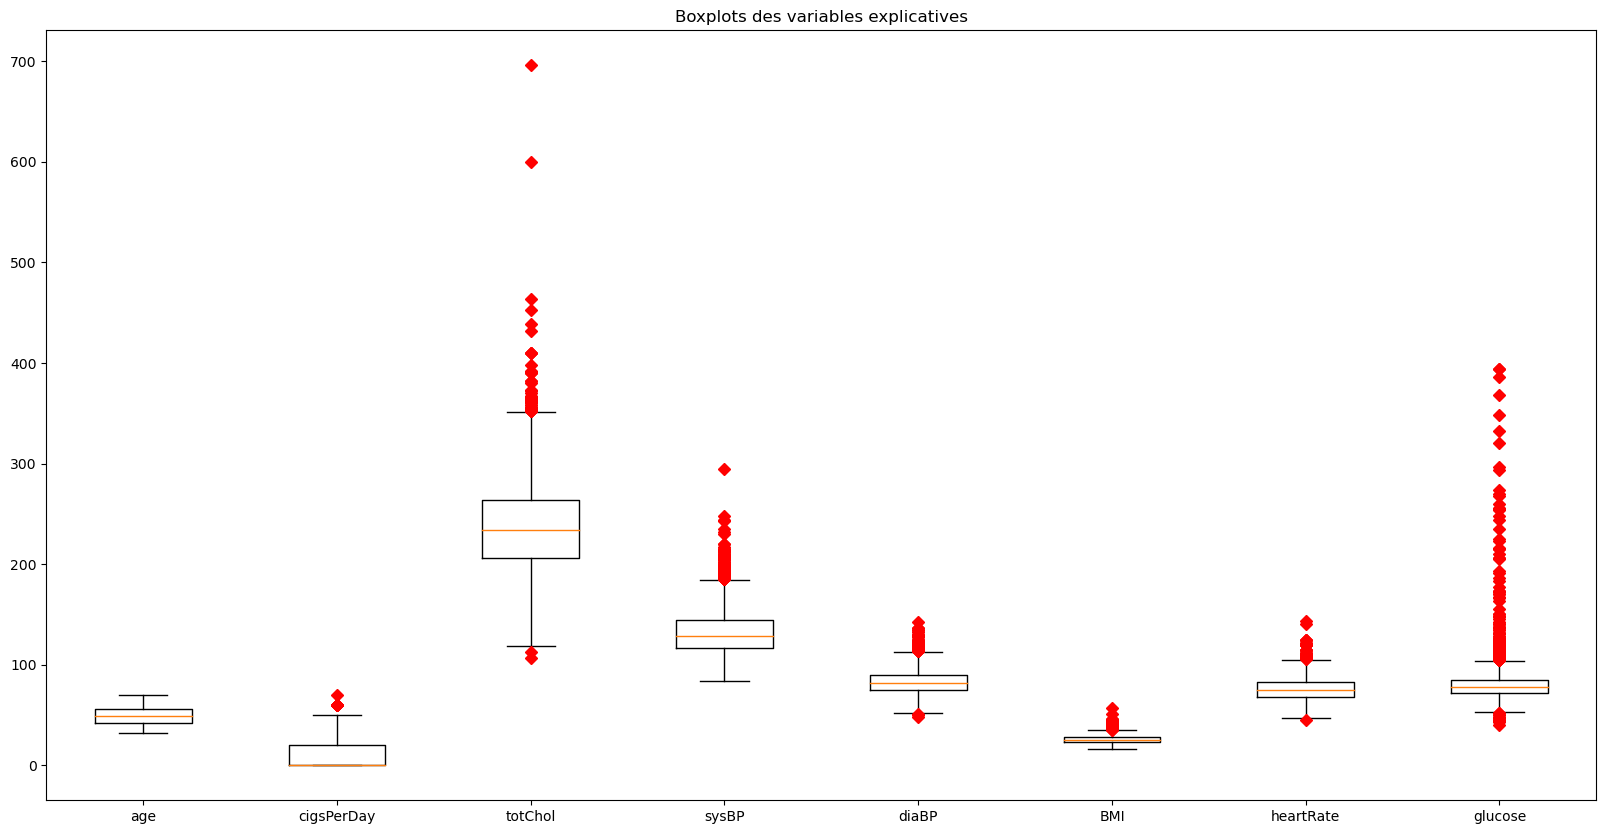

In [5]:
# Affichage des boxplots de toutes les variables du dataframe data

# Récupération des indices des colonnes 
ls_features = list(data.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplots des variables explicatives')
plt.boxplot(data.values, 0, 'rD', labels = ls_features)

plt.show()

### Analyse de données avec l'algorithme des Kmeans

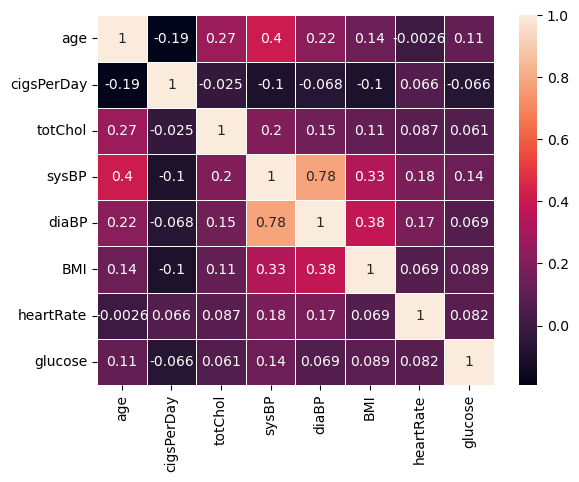

In [6]:
# Affichage de la table des corrélations

sns.heatmap(data.corr(), annot=True, linewidth=.5);

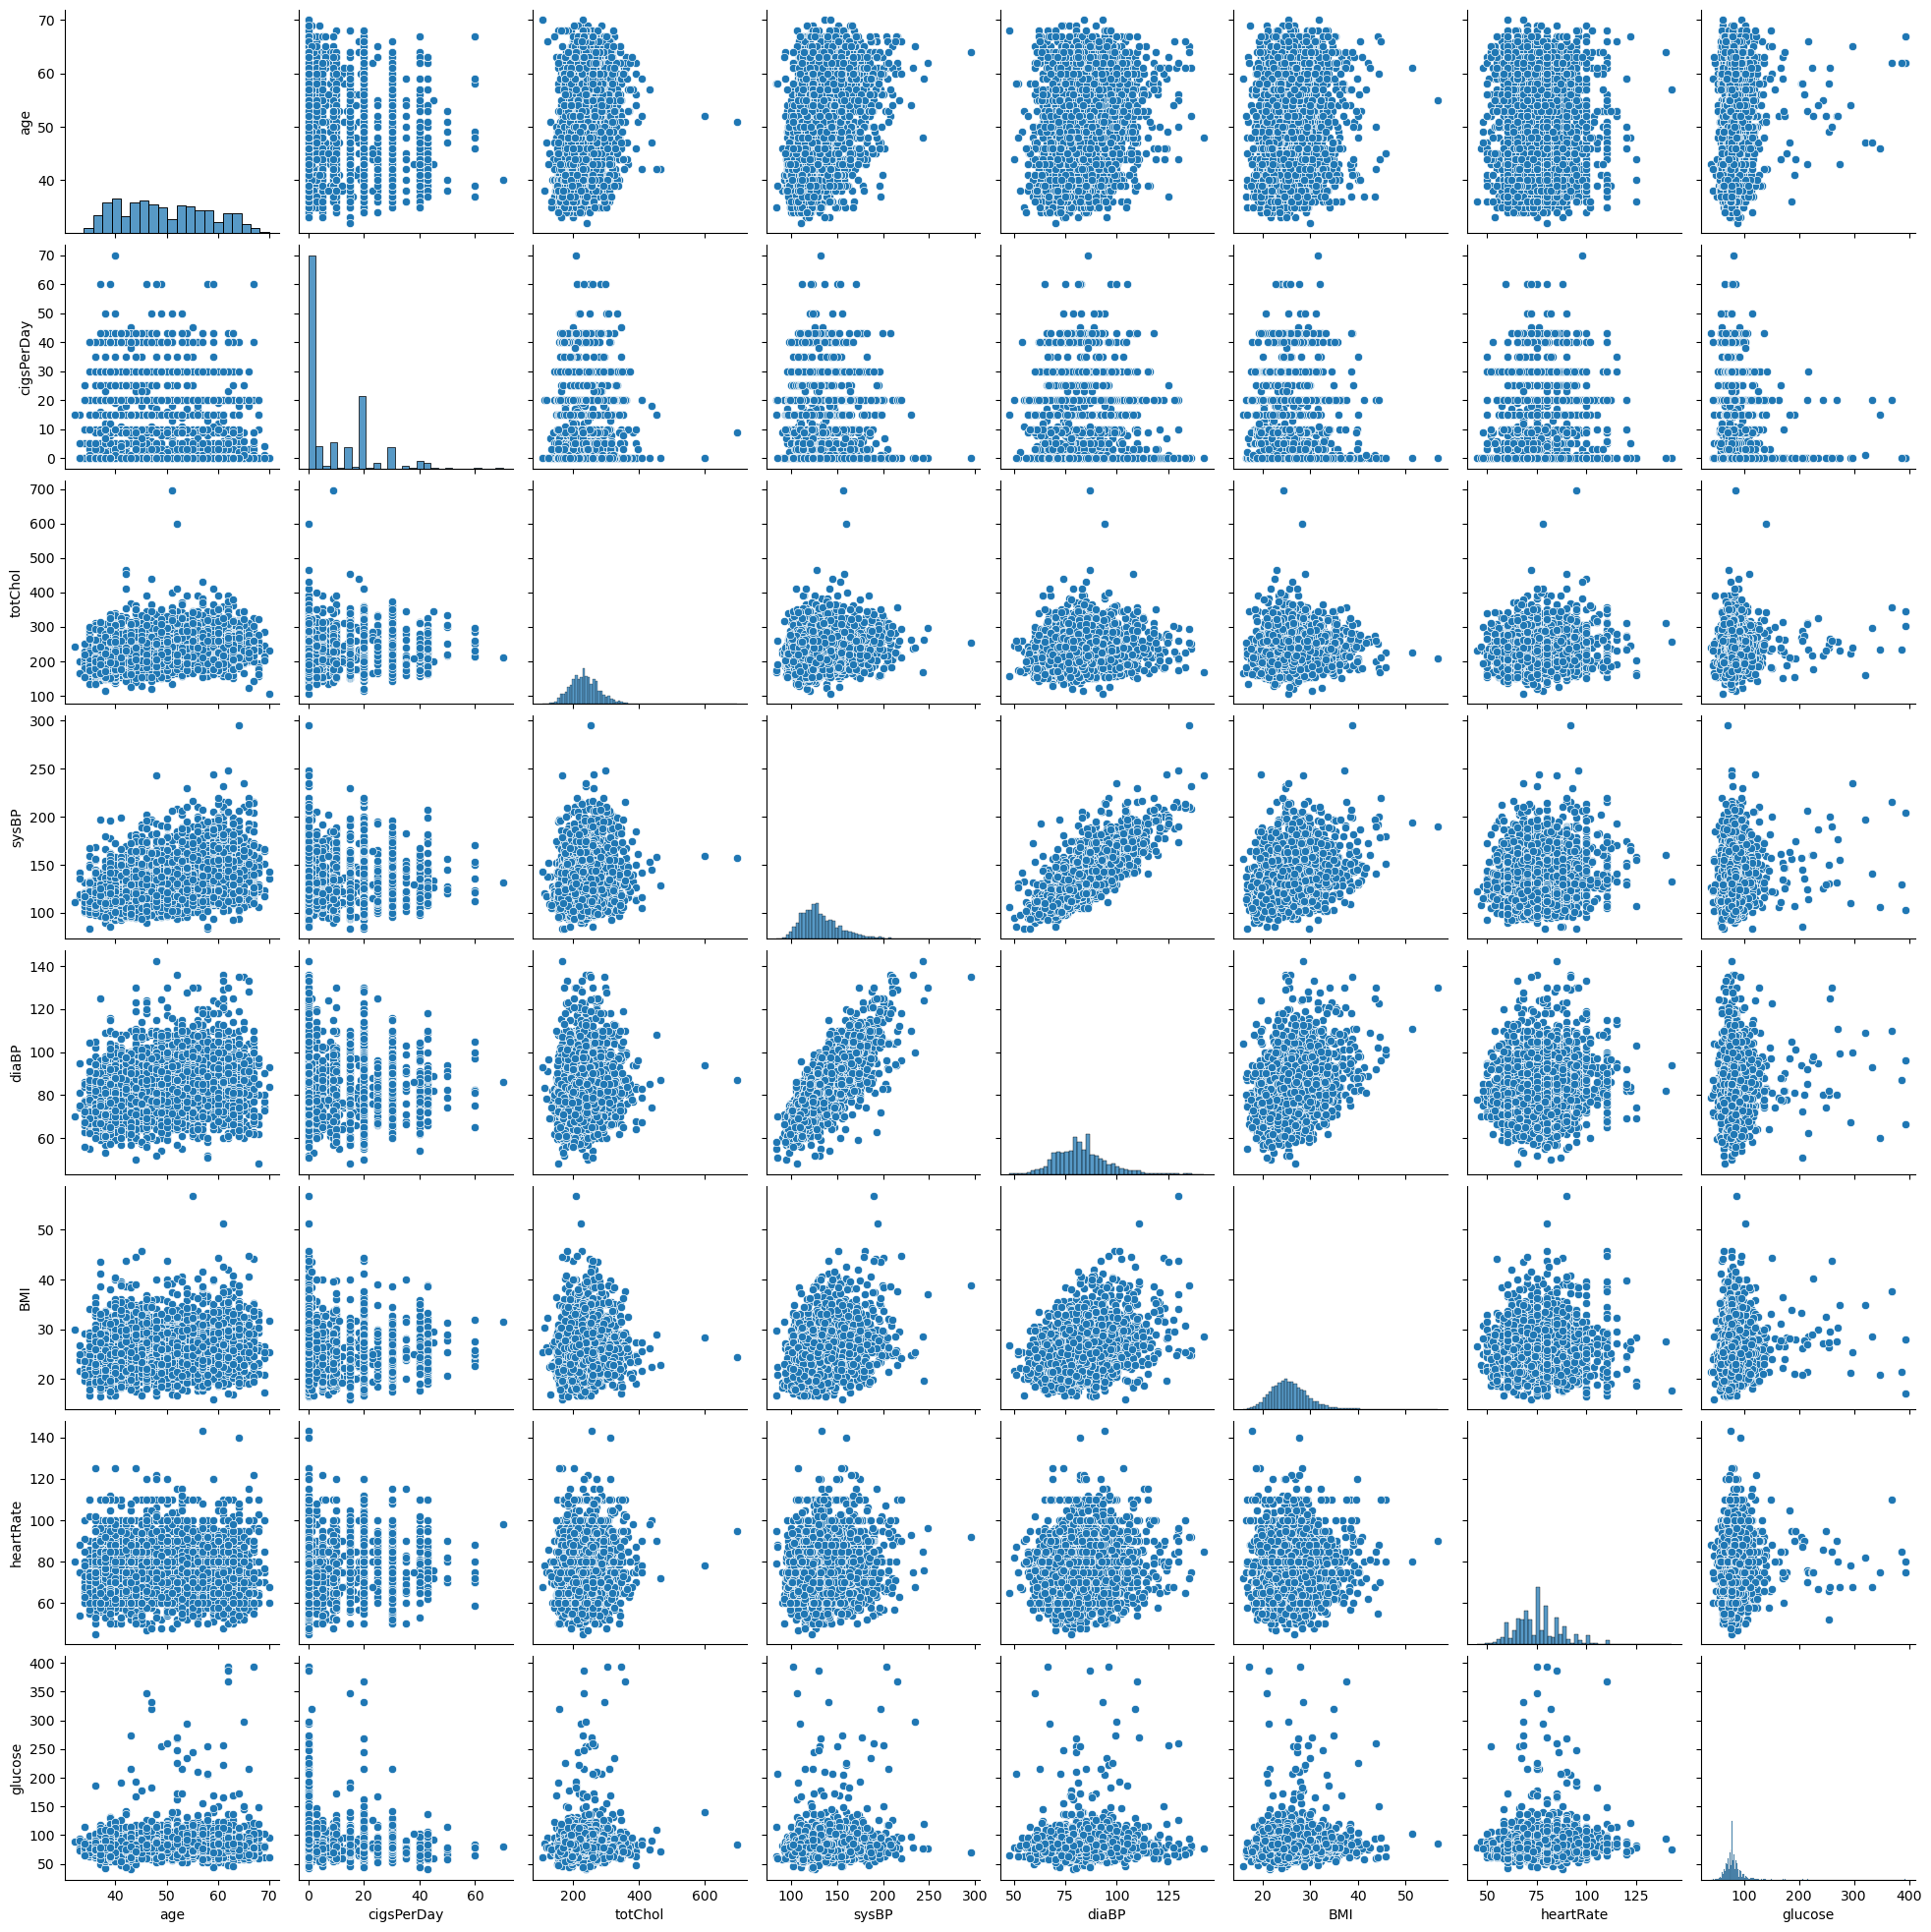

In [7]:
sns.pairplot(data);

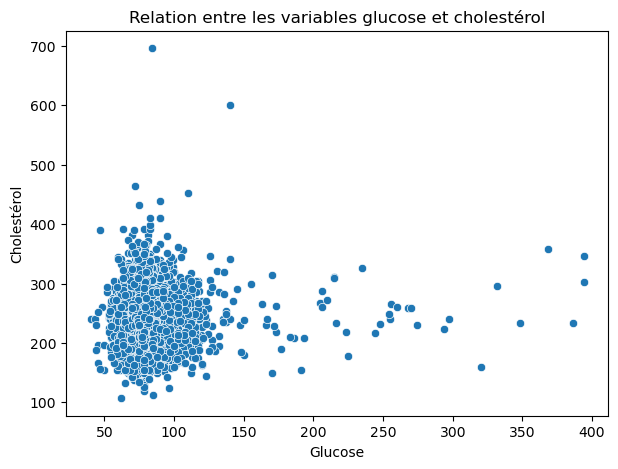

In [8]:
# Nous allons essayer d'appliquer la méthode des K-Means et la clusterisation
# sur le nuage de points représentant la corrélation entre la variable 'glucose' et 
# la variable 'totChol' (taux de cholestérol)

# Création et affichage du nuage de points :

plt.figure(figsize = (7,5))
plt.title('Relation entre les variables glucose et cholestérol')
plt.xlabel('Glucose')
plt.ylabel('Cholestérol')

sns.scatterplot(data = data, x = 'glucose', y='totChol');

In [9]:
# Normalisation des données

from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

df_norm = SC.fit_transform(data)

In [10]:
## df_kmeans ne contient que les variables 'totChol' et 'glucose'
df_kmeans = pd.DataFrame(df_norm[:,(2,7)], columns=['totChol','glucose'])

df_kmeans.head()

,totChol,glucose
0,-0.356539,-0.074275
1,-0.556594,-0.290185
2,0.288084,0.530271
3,-0.089799,0.530271
4,0.088028,-0.203821


In [11]:
# Import de l'agorithme K-Mean avec un nombre de clusters fixé arbitrairement à 2

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)

# Entraînement du modèle et affichage des prédictions

kmeans.fit(df_kmeans)

y_kmeans = kmeans.predict(df_kmeans)

print(y_kmeans)

[1 1 0 ... 0 1 0]


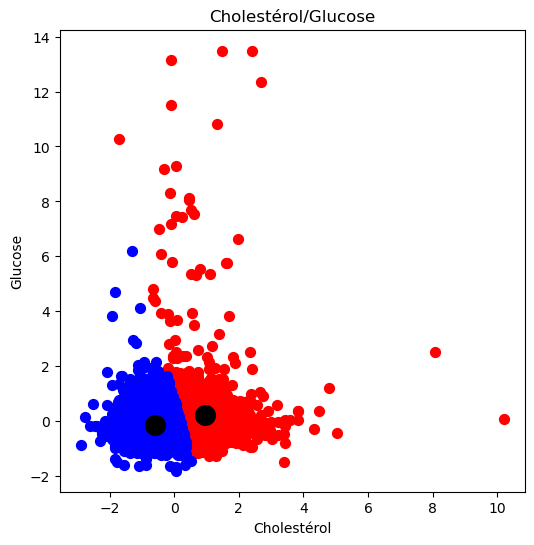

In [12]:
# Affichage du scatterplot avec les points colorés en fonction du cluster auquel
# ils appartiennent. Affichage des centroïdes

plt.figure(figsize=(6,6))

plt.scatter(df_kmeans[y_kmeans==0].iloc[:,0], df_kmeans[y_kmeans==0].iloc[:,1],
            s=50, c='red', label='Cluster 0')

plt.scatter(df_kmeans[y_kmeans==1].iloc[:,0], df_kmeans[y_kmeans==1].iloc[:,1],
            s=50, c='blue', label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Cholestérol') 
plt.ylabel('Glucose')
plt.title('Cholestérol/Glucose');

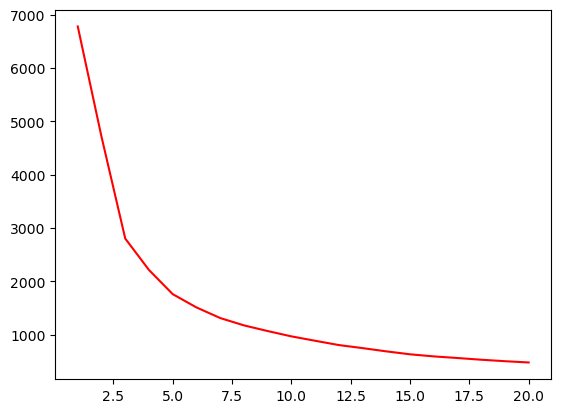

In [13]:
# Nous allons rechercher le nombre idéal de clusters 

L = []

for i in np.arange(1,21,1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_kmeans)
    L.append(kmeans.inertia_) 

plt.figure()
plt.plot(np.arange(1,21,1), L, c='red');

In [14]:
# Le coude semble se situer à 3, le meilleur nombre de clusters est donc de 3.

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_kmeans)
y_kmeans = kmeans.fit_predict(df_kmeans)
y_kmeans

array([0, 0, 2, ..., 2, 0, 2])

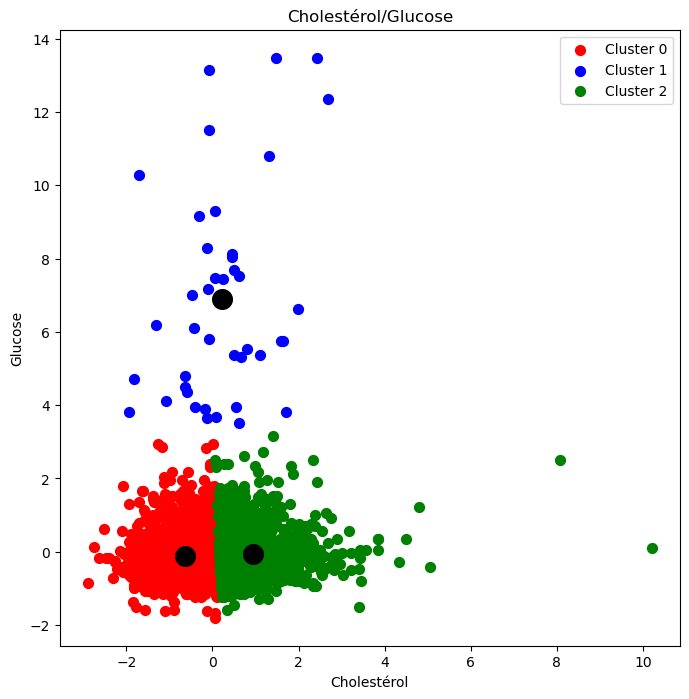

In [15]:
# Affichage du scatterplot avec les 3 clusters et leurs centroïdes

plt.figure(figsize=(8,8))

plt.scatter(df_kmeans[y_kmeans==0].iloc[:,0], df_kmeans[y_kmeans==0].iloc[:,1],
            s=50, c='red', label='Cluster 0')

plt.scatter(df_kmeans[y_kmeans==1].iloc[:,0], df_kmeans[y_kmeans==1].iloc[:,1],
            s=50, c='blue', label='Cluster 1')

plt.scatter(df_kmeans[y_kmeans==2].iloc[:,0], df_kmeans[y_kmeans==2].iloc[:,1],
            s=50, c='green', label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Cholestérol') 
plt.ylabel('Glucose')
plt.title('Cholestérol/Glucose')
plt.legend();

### Que ce passe-t-il si on ne normalise pas les données ?

In [16]:
## df_kmeans2 ne contient que les variables 'totChol' et 'glucose'
df_kmeans2 = data[['totChol','glucose']]

df_kmeans2.head()

,totChol,glucose
id,,
0,221.0,80.0
1,212.0,75.0
2,250.0,94.0
3,233.0,94.0
4,241.0,77.0


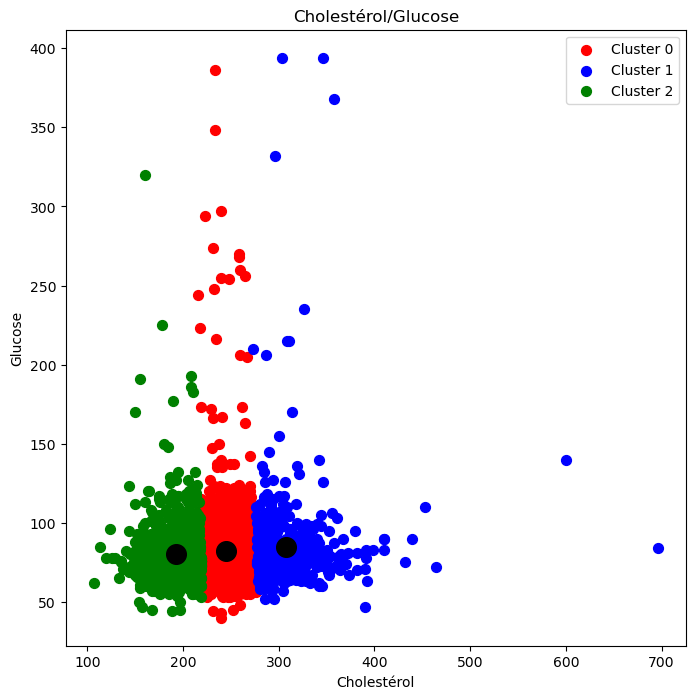

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_kmeans2)
y_kmeans = kmeans.fit_predict(df_kmeans2)

# Affichage du scatterplot avec les 3 clusters et leur centroïde

plt.figure(figsize=(8,8))

plt.scatter(df_kmeans2[y_kmeans==0].iloc[:,0], df_kmeans2[y_kmeans==0].iloc[:,1],
            s=50, c='red', label='Cluster 0')

plt.scatter(df_kmeans2[y_kmeans==1].iloc[:,0], df_kmeans2[y_kmeans==1].iloc[:,1],
            s=50, c='blue', label='Cluster 1')

plt.scatter(df_kmeans2[y_kmeans==2].iloc[:,0], df_kmeans2[y_kmeans==2].iloc[:,1],
            s=50, c='green', label='Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=200)

plt.xlabel('Cholestérol') 
plt.ylabel('Glucose')
plt.title('Cholestérol/Glucose')
plt.legend();